In [2]:
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib as mpl

Goal:
To study the difference in the winds from the machine-learning model and the NORKSYT model

In [3]:
#Downloading datasets
#Dateset 1 is the NORKYST s-depth march 30.03.2012
sdepth = f'/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2012/03/norkyst800-20120330.nc'
#Dataset 2 and 3 is the norkyst hindcast 2012 3km
interp_u = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkyst-v3-hindcast/interp_forcings/wrf_3km_norkyst800_2012_ext_NF800_Uwind.nc'
interp_v = f'/lustre/storeB/project/fou/hi/foccus/datasets/norkyst-v3-hindcast/interp_forcings/wrf_3km_norkyst800_2012_ext_NF800_Vwind.nc'

In [ ]:
#Reading in the files
ds_sdepth = xr.open_dataset(sdepth)
ds_interp_u = xr.open_dataset(interp_u)
ds_interp_v = xr.open_dataset(interp_v)

#To plot the wind at the same date (here 30.03.2012 T0 00:00:00:00) I use time = ds_sdepth.time.values nearest to compare the times of the interp dataset to the times selected in the NORKYST data
#ds_interp_u["time"]
ds_sdepth["time"]
test = ds_interp_u.sel(time=ds_sdepth.time.values, method='nearest')

In [18]:
ds_interp_u

<xarray.Dataset> Size: 73GB
Dimensions:           (Y: 1148, X: 2747, time: 2906)
Coordinates:
  * time              (time) datetime64[ns] 23kB 2011-12-30T21:00:00 ... 2013...
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
    s_rho             float64 8B ...
Data variables:
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB ...
    Uwind             (time, Y, X) float64 73GB ...
    projection_stere  int32 4B ...

In [24]:
test
#Creating a function to plot the selected time, it seems correct and therefore I decide to use it within my plotting function
plotter_u = ds_interp_u.sel(time= '2012-03-30T00:00:00.000000000', method = "nearest")
print(plotter_u.values)
plotter_v = ds_interp_v.sel(time = '2012-03-30T00:00:00.000000000', method = "nearest")
print(plotter_v)

<bound method Mapping.values of <xarray.Dataset> Size: 76MB
Dimensions:           (Y: 1148, X: 2747)
Coordinates:
    time              datetime64[ns] 8B 2012-03-30
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
    s_rho             float64 8B ...
Data variables:
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB ...
    Uwind             (Y, X) float64 25MB ...
    projection_stere  int32 4B ...>
<xarray.Dataset> Size: 76MB
Dimensions:           (Y: 1148, X: 2747)
Coordinates:
    time              datetime64[ns] 8B 2012-03-30
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
    s_rho             float64 8B ...
Data variables:
    lon               (Y, X) float64 25MB ...
    lat               (Y, X) float64 25MB ...
    Vwin

In [ ]:
#Trying to find where in the timearray we have this date, but I am struggling to understand the output recieved. I therefore use the function in the code over instead
time_interp = ds_interp_u["time"].where("2012-03-30T00:00:00.000000000")

In [23]:
latitude = ds_sdepth["lat"]
longitude = ds_sdepth["lon"]

u_wind_sdepth = ds_sdepth["Uwind_eastward"]
v_wind_sdepth = ds_sdepth["Vwind_northward"]



In [22]:
u_wind_sdepth.head()
#v_wind_sdepth.head()

<xarray.DataArray 'Uwind_eastward' (time: 5, Y: 5, X: 5)> Size: 500B
[125 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 40B 2012-03-30 ... 2012-03-30T04:00:00
  * X        (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y        (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
    lon      (Y, X) float64 200B ...
    lat      (Y, X) float64 200B ...
Attributes:
    units:                  meter second-1
    grid:                   grid
    location:               face
    field:                  u-wind, scalar, series
    grid_mapping:           projection_stere
    coverage_content_type:  modelResult
    standard_name:          eastward_wind
    long_name:              surface u-wind component
    time:                   time

Not necessary to remove landmask when plotting the difference in winds because nan values will continue as nan values when subtracting two datasets.

In [34]:
def plotting_output_compare(variable_1, variable_2, title_1, title_2, title_3, variable_1_name, variable_2_name):
    fig,ax = plt.subplots(3, figsize = (8,14))

    #Colormap colors
    cmap = plt.cm.coolwarm
    norm1 = mpl.colors.Normalize(vmin=-15,vmax=20) 
    norm2 = mpl.colors.Normalize(vmin=-1,vmax=1) #small values in the last plot to be able to easily spot the difference when comparing plots 

    #Image 1
    image1 = ax[0].pcolormesh(variable_1, shading = "auto", cmap=cmap, norm = norm1)
    ax[0].set_title(title_1)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")

    #Image 2
    image2 = ax[1].pcolormesh(variable_2, shading = "auto", cmap = cmap, norm = norm1)
    ax[1].set_title(title_2)
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")

    #Image 3 - comparing the data. Value 2 - value 1. 
    image3 = ax[2].contourf(variable_2 - variable_1, shading = "auto", cmap = cmap, norm = norm2)
    #image3 = ax[2].quiver(x,y,variable_2 - variable_1, scale=1, color = "black")
    ax[2].set_title(title_3)
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    plt.suptitle("Date: 2012-03-30")
    plt.tight_layout()

    
    fig.colorbar(image1, cmap=cmap, ax=ax[0], label = f'{variable_1_name}')
    fig.colorbar(image2, cmap=cmap, ax=ax[1], label = f'{variable_2_name}')
    fig.colorbar(image3, cmap=cmap, ax=ax[2], label = f'Comparison of: {variable_2_name} - {variable_1_name}')
    return plotting_output_compare

/tmp/ipykernel_648383/3728701156.py:22: UserWarning: The following kwargs were not used by contour: 'shading'
  image3 = ax[2].contourf(variable_2 - variable_1, shading = "auto", cmap = cmap, norm = norm2)


<function __main__.plotting_output_compare(variable_1, variable_2, title_1, title_2, title_3, variable_1_name, variable_2_name)>

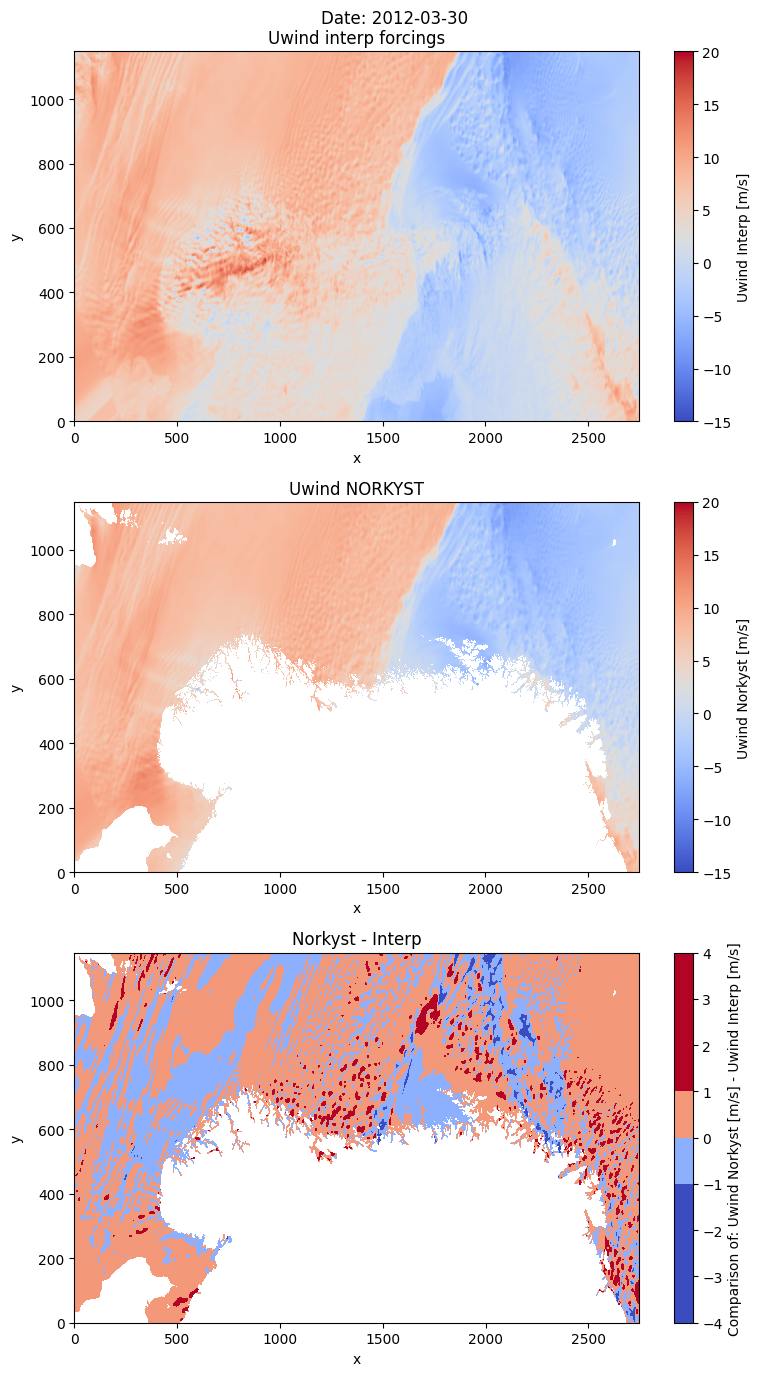

In [35]:
plotting_output_compare(plotter_u["Uwind"][:,:], u_wind_sdepth[1,:,:], title_1="Uwind interp forcings", title_2="Uwind NORKYST", title_3="Norkyst - Interp", variable_1_name="Uwind Interp [m/s]", variable_2_name="Uwind Norkyst [m/s]")

In [ ]:
"""
#Repeated for the v-wind if wanted
plotting_output_compare(plotter_v["Vwind"][:,:], v_wind_sdepth[1,:,:], title_1 = "Vwind interp", title_2="Vwind NORKYST", title_3="NORKYST-Interp", variable_1_name="Vwind Interp [m/s]", variable_2_name="Vwind Norkyst [m/s]")
"""

'\n#Repeat for wind north\nplotting_output_compare(ds_interp_v["Vwind"][1,:,:], v_wind_sdepth[1,:,:], title_1 = "Vwind interp", title_2="Vwind NORKYST", title_3="NORKYST-Interp", variable_1_name="Vwind Interp [m/s]", variable_2_name="Vwind Norkyst [m/s]")\n'

In [28]:
#pythagoras to calculate the total wind speed
tot_speed_interp = (plotter_u["Uwind"][:,:]**2 + plotter_v["Vwind"][:,:]**2)**0.5
tot_speed_norkyst = (u_wind_sdepth[1,:,:]**2 + v_wind_sdepth[1,:,:]**2)**0.5
print(tot_speed_interp)
print(tot_speed_norkyst)



<xarray.DataArray (Y: 1148, X: 2747)> Size: 25MB
array([[7.96382955, 7.92696122, 7.8901031 , ..., 6.39574833, 6.54981445,
        6.72659758],
       [8.02221006, 7.98532921, 7.94848615, ..., 6.31672838, 6.46807234,
        6.61596801],
       [8.08063151, 8.04376204, 8.00690024, ..., 6.27163871, 6.39242945,
        6.53363345],
       ...,
       [5.41874331, 5.31509947, 5.30214805, ..., 7.45585086, 7.47307188,
        7.48754224],
       [5.50207467, 5.48872079, 5.47540072, ..., 7.44816178, 7.46536404,
        7.48090977],
       [5.62319968, 5.52188222, 5.42064228, ..., 7.44295566, 7.45763919,
        7.47452664]], shape=(1148, 2747))
Coordinates:
    time     datetime64[ns] 8B 2012-03-30
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    s_rho    float64 8B -0.9799
<xarray.DataArray (Y: 1148, X: 2747)> Size: 13MB
array([[      nan,       nan,       nan, ..., 6.4212303, 6.408502 

/tmp/ipykernel_648383/1824787432.py:22: UserWarning: The following kwargs were not used by contour: 'shading'
  image3 = ax[2].contourf(variable_2 - variable_1, shading = "auto", cmap = cmap, norm = norm2)


<function __main__.plotting_output_compare(variable_1, variable_2, title_1, title_2, title_3, variable_1_name, variable_2_name)>

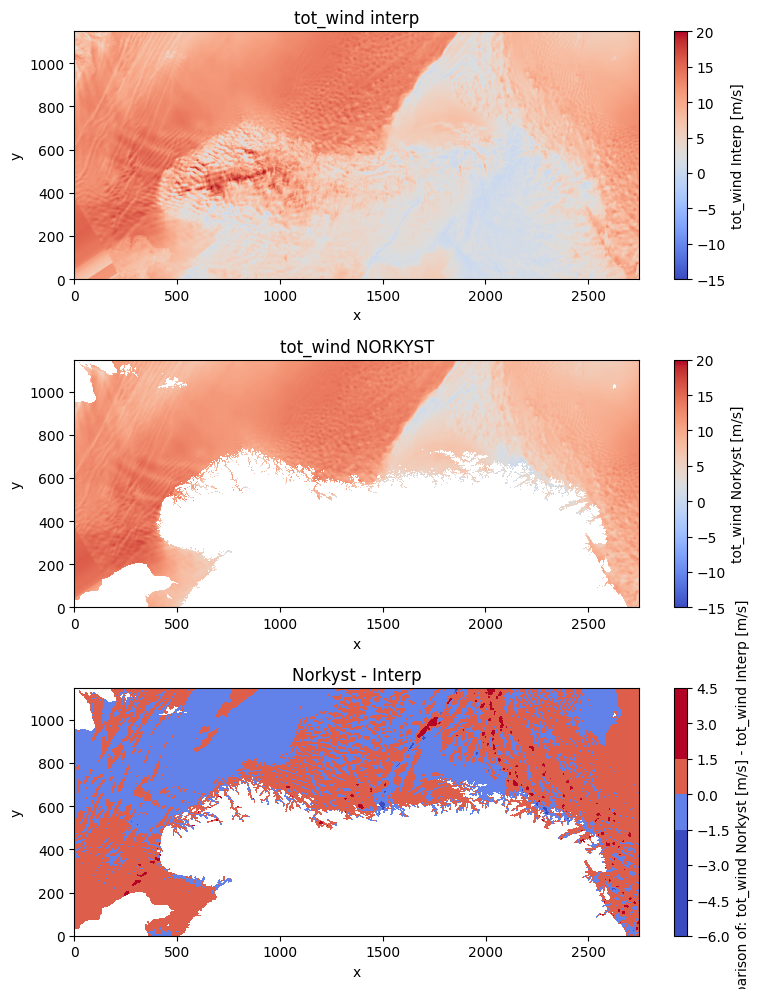

In [ ]:
#Might not be necessary
plotting_output_compare(tot_speed_interp,tot_speed_norkyst , title_1="tot_wind interp", title_2="tot_wind NORKYST", title_3="Norkyst - Interp", variable_1_name="tot_wind Interp [m/s]", variable_2_name="tot_wind Norkyst [m/s]")

In [ ]:
#Calculating the correlation between the sdepth u-winds and the interp-forcings u-winds.
#xr.corr uses the Pearson correlation coefficient for dimension Y representing the zonal component
correlation = xr.corr(plotter_u["Uwind"][:,:], u_wind_sdepth[1,:,:], dim="Y")
print(f'The correlation coefficient is {correlation}')

The correlation coefficient is <xarray.DataArray (X: 2747)> Size: 22kB
array([0.98854459, 0.98861182, 0.98869399, ..., 0.98257815, 0.98341875,
       0.98357006], shape=(2747,))
Coordinates:
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
    s_rho    float64 8B -0.9799


In [66]:
differance = plotter_u["Uwind"][:,:] - u_wind_sdepth[1,:,:]
maxi = differance.max()
mini = differance.min()
print(f'The maximum difference between the variables is {maxi} and the minimum is {mini}')
print(f'The standard deviation of the difference is: {differance.std()}')
print(f'The mean difference of the sum is: {differance.mean()}')




The maximum difference between the variables is <xarray.DataArray ()> Size: 8B
array(3.7056329)
Coordinates:
    s_rho    float64 8B ... and the minimum is <xarray.DataArray ()> Size: 8B
array(-3.17669109)
Coordinates:
    s_rho    float64 8B ...
The standard deviation of the difference is: <xarray.DataArray ()> Size: 8B
array(0.47347679)
Coordinates:
    s_rho    float64 8B ...
The mean difference of the sum is: <xarray.DataArray ()> Size: 8B
array(-0.0455061)
Coordinates:
    s_rho    float64 8B ...


Based on the plot:
The u-wind seems to be quite similiar when comparing the plots of the interp forcings dataset for 30th of March 2012 with the NORKYST dataset from the 30th of March 2012. The values seem to correspond for the mostpart, though as seen in the third plot when subtracting the values of Norkyst from the Interp values, there are some variatons. Because of these differences I used the xr.corr function, calculating the Pearson correlation coefficient between the values for the dimension Y. Y is used because the Norwegian coast is rotated in the dataset, meaning the X representes the meridional componenet and Y representing the zonal component. The returned array of coefficients are quite high, near 1 in most areas. Non of them are less than 0.98, indicating a strong linear relationship. The level of signficance is typically at 0.5, i.e. 95% treshold.   
The blue areas of the map indicate a negative value, meaning the the winds are blowing from east to west. The red areas of the map indiciate a positive value, meaning the winds are blowing west to east. 

To further compare I choose to plot one or to more dates, which means there is a need to import a new NORKYST datafile. 